In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# fy23-adopted-operating-budget.csv contains
#   8 columns A-H
#   776 rows 1-776
file_adopted_operating_budget_fy23 = pd.read_csv('./Data/csv/fy23-adopted-operating-budget.csv')

budget_df_uncut = pd.DataFrame(file_adopted_operating_budget_fy23)


budget_df_withNA = budget_df_uncut[['Cabinet', 'Dept', 'Program   ', 'Expense Category',
       'FY20 Actual Expense', 'FY21 Actual Expense', 'FY22 Appropriation',
       'FY23 Adopted']]

budget_df = budget_df_withNA.dropna()

/var/folders/15/ngd639_x4tn_n4xh55wvc5lr0000gn/T/ipykernel_30676/1360075920.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


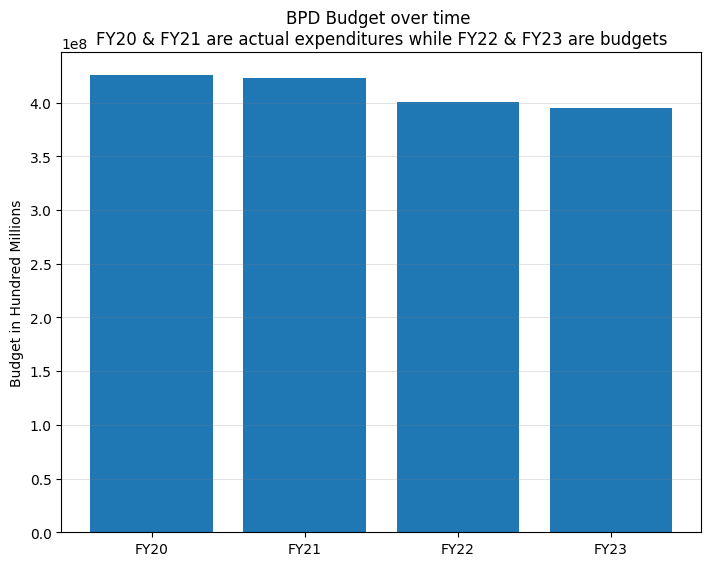

In [70]:

bpd_budget_df = budget_df.loc[budget_df['Dept'] == "Police Department"]
fy20_actual_exp = bpd_budget_df['FY20 Actual Expense'].copy()

# Replace '#Missing' values with '0' so we can type cast the columns to numbers
bpd_budget_df = bpd_budget_df.replace('#Missing', '0')

# Convert datatype to strings 
bpd_budget_df['FY20 Actual Expense'] = bpd_budget_df['FY20 Actual Expense'].apply(lambda x: float(x.replace(",","").replace("$","")) if x != 'TOTAL_GROSS' and str(type(x)) == '<class \'str\'>' else x)
bpd_budget_df['FY21 Actual Expense'] = bpd_budget_df['FY21 Actual Expense'].apply(lambda x: float(x.replace(",","").replace("$","")) if x != 'TOTAL_GROSS' and str(type(x)) == '<class \'str\'>' else x)
bpd_budget_df['FY22 Appropriation'] = bpd_budget_df['FY22 Appropriation'].apply(lambda x: float(x.replace(",","").replace("$","")) if x != 'TOTAL_GROSS' and str(type(x)) == '<class \'str\'>' else x)
bpd_budget_df['FY23 Adopted'] = bpd_budget_df['FY23 Adopted'].apply(lambda x: float(x.replace(",","").replace("$","")) if x != 'TOTAL_GROSS' and str(type(x)) == '<class \'str\'>' else x)

# Compute sums and add to list
plt_vals = []
plt_vals.append(bpd_budget_df['FY20 Actual Expense'].sum())
plt_vals.append(bpd_budget_df['FY21 Actual Expense'].sum())
plt_vals.append(bpd_budget_df['FY22 Appropriation'].sum())  # Appropriated budget = means ?? (GUESS: Proposed budget (Needs approval until adopted!))
plt_vals.append(bpd_budget_df['FY23 Adopted'].sum())  # Adopted budget = 1 year spending fianncial plan

# Plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("BPD Budget over time \nFY20 & FY21 are actual expenditures while FY22 & FY23 are budgets")
ax.set_ylabel("Budget in Hundred Millions")
ax.grid(b = True, color ='grey',
        linestyle ='-', linewidth = 0.4,
        alpha = 0.4, axis='y')
plt.bar(['FY20', 'FY21', 'FY22', 'FY23'], plt_vals)
plt.show()

NOTE: Boston city govt website already provides graphs showing change in deparmental budget over time, including expense type breakdown
https://www.boston.gov/departments/budget/fy23-operating-budget
- Scroll down to "Departmental Spending" and select Police Department

Trend: Police dept budget slightly decreased in recent years. Personnel services budget decreased while contract services budget increased 

What next? 
How does having these graphs affect our work? Should we pivot and focus on other areas or redraw the graphs in other visually meaningful ways?